## Week 4 Individual Assignment
For this assignment I'm exploring affordable housing project data in the city of LA from 2003-present. I'll use plotly to create interative charts and maps to get a better understanding of the types and location affordable housing projects that have been built in the city in the last 20 years.  

In [54]:
import pandas as pd
import geopandas as gpd

In [55]:
# importing affordable housing data
df = pd.read_csv('data/LAHD_Affordable_Housing_Projects_List__2003_to_Present_.csv')

In [56]:
# inspecting the data
df.shape

(558, 31)

In [57]:
df.head(10)

,APN,PROJECT NUMBER,NAME,DEVELOPMENT STAGE,CONSTRUCTION TYPE,SITE ADDRESS,SITE COUNCIL DISTRICT,SITE #,SITE COMMUNITY,SITE UNITS,PROJECT TOTAL UNITS,HOUSING TYPE,SUPPORTIVE HOUSING,SH UNITS PER SITE,DATE FUNDED,LAHD FUNDED,LEVERAGE,TAX EXEMPT CONDUIT BOND,TDC,IN-SERVICE DATE,DEVELOPER,MANAGEMENT COMPANY,CONTACT PHONE,PHOTO,JOBS,PROJECT SUMMARY URL,CONTRACT NUMBERS,DATE STAMP,SITE LONGITUDE,SITE LATITUDE,GPS_COORDS ON MAP
0,5143020023,02-118256,SAN LUCAS APARTMENTS,In-Service,NEW CONSTRUCTION,"1221 W 7TH ST Los Angeles, CA 90017",1,1,WESTLAKE,196,196,SENIORS,No,0,11/29/2001,0.00,0.0,0,0.00,2003,NaN,GSL PROPERRTY MANAGEMENT,NaN,click here (http://hcidapp.lacity.org/mpphotos...,NaN,click here (http://hcidapp.lacity.org/ahtfRepo...,NaN,2023-01-09T00:00:00.000,-118.26681,34.05209,POINT (-118.26681 34.05209)
1,6032019034,14-121272,MARTHA BRYANT MANOR- RECAP,In-Service,ACQUISITION + REHAB,"8300 S HOOVER ST Los Angeles, CA 90044",8,1,VERMONT VISTA,77,77,FAMILY,No,0,02/27/2015,0.00,7558174.0,4410000,11968174.00,2016,"BARKER MANAGEMENT, INC.","LEVINE MANAGEMENT GROUP, INC.",(310) 358-3489,click here (http://hcidapp.lacity.org/mpphotos...,NaN,click here (http://hcidapp.lacity.org/ahtfRepo...,NaN,2023-01-09T00:00:00.000,-118.28691,33.96297,POINT (-118.28691 33.96297)
2,5050011005,05-117193,LEEWARD APTS. (SITE 7),In-Service,REHAB,"2809 S WEST BLVD Los Angeles, CA 90016",10,7,CRENSHAW DISTRICT,0,257,FAMILY,No,0,05/02/2005,0.00,7103994.0,10208936,17312930.00,2006,"HAMPSTEAD PARTNERS, INC.","ALPHA PROPERTY MANAGEMENT, INC.",(323) 231-4174,click here (http://hcidapp.lacity.org/mpphotos...,NaN,click here (http://hcidapp.lacity.org/ahtfRepo...,NaN,2023-01-09T00:00:00.000,-118.34182,34.03071,POINT (-118.34182 34.03071)
3,5114014020,14-121652,FLORENCE MILLS (SITE 5),In-Service,NEW CONSTRUCTION,"1037 E MARTIN LUTHER KING BLVD LOS ANGELES, C...",9,5,CENTRAL,0,74,SPECIAL NEEDS,Yes,0,12/17/2018,9389115.63,36081992.0,0,45471107.63,2021,Hollywood Community Housing Corporation,BARKER MANAGEMENT INCORPORATED,(714) 533-3450,click here (http://hcidapp.lacity.org/mpphotos...,226.0,click here (http://hcidapp.lacity.org/ahtfRepo...,C-129358,2023-01-09T00:00:00.000,-118.25748,34.01115,POINT (-118.25748 34.01115)
4,4012018025,60013,MORGAN PLACE SENIOR APTS.,In-Service,NEW CONSTRUCTION,"7305 S CRENSHAW BLVD Los Angeles, CA 90043",8,1,HYDE PARK,55,55,SENIORS,No,0,04/02/2007,5281147.00,8428737.0,0,13709884.00,2009,Abode Communities previously known as LA COMMU...,ABODE COMMUNITIES,(213) 225-2772,click here (http://hcidapp.lacity.org/mpphotos...,110.0,click here (http://hcidapp.lacity.org/ahtfRepo...,C-111486,2023-01-09T00:00:00.000,-118.33108,33.97348,POINT (-118.33108 33.97348)
5,5153030026,50036,WITMER HEIGHTS,In-Service,NaN,"116 S WITMER ST Los Angeles, CA 90026",13,1,TEMPLE-BEAUDRY,49,49,FAMILY,No,0,01/19/2006,2846000.00,10865989.0,0,13711989.00,2008,"AMERICAN COMMUNITIES, LLC",THE JOHN STEWART COMPANY,(213) 482-9122,click here (http://hcidapp.lacity.org/mpphotos...,95.0,click here (http://hcidapp.lacity.org/ahtfRepo...,C-109452,2023-01-09T00:00:00.000,-118.26086,34.06173,POINT (-118.26086 34.06173)
6,5127029049,18-125459,LA PRENSA LIBRE- 9% (FKA WASHINGTON/ LA),Development,NEW CONSTRUCTION,"200 E WASHINGTON BLVD Los Angeles, CA 90015",9,1,UNIVERSITY PARK,42,42,FAMILY,No,0,11/12/2020,1651192.00,29619133.0,0,31270325.00,Development,Coalition for Responsible Community Developmen...,"FPI MANAGEMENT, INC.",(916) 357-5312 x434,click here (http://hcidapp.lacity.org/mpphotos...,NaN,click here (http://hcidapp.lacity.org/ahtfRepo...,C-137346,2023-01-09T00:00:00.000,-118.26339,34.03028,POINT (-118.26339 34.03028)
7,5037025018,14-121612,KING 1101,In-Service,NEW CONSTRUCTION,"1107 W MARTIN LUTHER KING BLVD Los Angeles, C...",8,1,EXPOSITION PARK,26,26,SPECIAL NEEDS,Yes,25,07/20/2016,4130000.00,12303276.0,0,16433276.00,2018,"Clifford Beers Housing, Inc.","LEVINE MANAGEMENT GROUP, INC",(310) 358-3489,click here (http://hcidapp.lacity.org/mpphotos...,85.0,click here (http://hc

In [58]:
# I want to view all the columns, so changing the display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [59]:
# checking the data again 
df.head(10)

,APN,PROJECT NUMBER,NAME,DEVELOPMENT STAGE,CONSTRUCTION TYPE,SITE ADDRESS,SITE COUNCIL DISTRICT,SITE #,SITE COMMUNITY,SITE UNITS,PROJECT TOTAL UNITS,HOUSING TYPE,SUPPORTIVE HOUSING,SH UNITS PER SITE,DATE FUNDED,LAHD FUNDED,LEVERAGE,TAX EXEMPT CONDUIT BOND,TDC,IN-SERVICE DATE,DEVELOPER,MANAGEMENT COMPANY,CONTACT PHONE,PHOTO,JOBS,PROJECT SUMMARY URL,CONTRACT NUMBERS,DATE STAMP,SITE LONGITUDE,SITE LATITUDE,GPS_COORDS ON MAP
0,5143020023,02-118256,SAN LUCAS APARTMENTS,In-Service,NEW CONSTRUCTION,"1221 W 7TH ST Los Angeles, CA 90017",1,1,WESTLAKE,196,196,SENIORS,No,0,11/29/2001,0.00,0.0,0,0.00,2003,NaN,GSL PROPERRTY MANAGEMENT,NaN,click here (http://hcidapp.lacity.org/mpphotos...,NaN,click here (http://hcidapp.lacity.org/ahtfRepo...,NaN,2023-01-09T00:00:00.000,-118.26681,34.05209,POINT (-118.26681 34.05209)
1,6032019034,14-121272,MARTHA BRYANT MANOR- RECAP,In-Service,ACQUISITION + REHAB,"8300 S HOOVER ST Los Angeles, CA 90044",8,1,VERMONT VISTA,77,77,FAMILY,No,0,02/27/2015,0.00,7558174.0,4410000,11968174.00,2016,"BARKER MANAGEMENT, INC.","LEVINE MANAGEMENT GROUP, INC.",(310) 358-3489,click here (http://hcidapp.lacity.org/mpphotos...,NaN,click here (http://hcidapp.lacity.org/ahtfRepo...,NaN,2023-01-09T00:00:00.000,-118.28691,33.96297,POINT (-118.28691 33.96297)
2,5050011005,05-117193,LEEWARD APTS. (SITE 7),In-Service,REHAB,"2809 S WEST BLVD Los Angeles, CA 90016",10,7,CRENSHAW DISTRICT,0,257,FAMILY,No,0,05/02/2005,0.00,7103994.0,10208936,17312930.00,2006,"HAMPSTEAD PARTNERS, INC.","ALPHA PROPERTY MANAGEMENT, INC.",(323) 231-4174,click here (http://hcidapp.lacity.org/mpphotos...,NaN,click here (http://hcidapp.lacity.org/ahtfRepo...,NaN,2023-01-09T00:00:00.000,-118.34182,34.03071,POINT (-118.34182 34.03071)
3,5114014020,14-121652,FLORENCE MILLS (SITE 5),In-Service,NEW CONSTRUCTION,"1037 E MARTIN LUTHER KING BLVD LOS ANGELES, C...",9,5,CENTRAL,0,74,SPECIAL NEEDS,Yes,0,12/17/2018,9389115.63,36081992.0,0,45471107.63,2021,Hollywood Community Housing Corporation,BARKER MANAGEMENT INCORPORATED,(714) 533-3450,click here (http://hcidapp.lacity.org/mpphotos...,226.0,click here (http://hcidapp.lacity.org/ahtfRepo...,C-129358,2023-01-09T00:00:00.000,-118.25748,34.01115,POINT (-118.25748 34.01115)
4,4012018025,60013,MORGAN PLACE SENIOR APTS.,In-Service,NEW CONSTRUCTION,"7305 S CRENSHAW BLVD Los Angeles, CA 90043",8,1,HYDE PARK,55,55,SENIORS,No,0,04/02/2007,5281147.00,8428737.0,0,13709884.00,2009,Abode Communities previously known as LA COMMU...,ABODE COMMUNITIES,(213) 225-2772,click here (http://hcidapp.lacity.org/mpphotos...,110.0,click here (http://hcidapp.lacity.org/ahtfRepo...,C-111486,2023-01-09T00:00:00.000,-118.33108,33.97348,POINT (-118.33108 33.97348)
5,5153030026,50036,WITMER HEIGHTS,In-Service,NaN,"116 S WITMER ST Los Angeles, CA 90026",13,1,TEMPLE-BEAUDRY,49,49,FAMILY,No,0,01/19/2006,2846000.00,10865989.0,0,13711989.00,2008,"AMERICAN COMMUNITIES, LLC",THE JOHN STEWART COMPANY,(213) 482-9122,click here (http://hcidapp.lacity.org/mpphotos...,95.0,click here (http://hcidapp.lacity.org/ahtfRepo...,C-109452,2023-01-09T00:00:00.000,-118.26086,34.06173,POINT (-118.26086 34.06173)
6,5127029049,18-125459,LA PRENSA LIBRE- 9% (FKA WASHINGTON/ LA),Development,NEW CONSTRUCTION,"200 E WASHINGTON BLVD Los Angeles, CA 90015",9,1,UNIVERSITY PARK,42,42,FAMILY,No,0,11/12/2020,1651192.00,29619133.0,0,31270325.00,Development,Coalition for Responsible Community Developmen...,"FPI MANAGEMENT, INC.",(916) 357-5312 x434,click here (http://hcidapp.lacity.org/mpphotos...,NaN,click here (http://hcidapp.lacity.org/ahtfRepo...,C-137346,2023-01-09T00:00:00.000,-118.26339,34.03028,POINT (-118.26339 34.03028)
7,5037025018,14-121612,KING 1101,In-Service,NEW CONSTRUCTION,"1107 W MARTIN LUTHER KING BLVD Los Angeles, C...",8,1,EXPOSITION PARK,26,26,SPECIAL NEEDS,Yes,25,07/20/2016,4130000.00,12303276.0,0,16433276.00,2018,"Clifford Beers Housing, Inc.","LEVINE MANAGEMENT GROUP, INC",(310) 358-3489,click here (http://hcidapp.lacity.org/mpphotos...,85.0,click here (http://hc

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   APN                      558 non-null    int64  
 1   PROJECT NUMBER           558 non-null    object 
 2   NAME                     558 non-null    object 
 3   DEVELOPMENT STAGE        558 non-null    object 
 4   CONSTRUCTION TYPE        528 non-null    object 
 5   SITE ADDRESS             558 non-null    object 
 6   SITE  COUNCIL DISTRICT   558 non-null    int64  
 7   SITE #                   558 non-null    int64  
 8   SITE COMMUNITY           551 non-null    object 
 9   SITE UNITS               558 non-null    int64  
 10  PROJECT TOTAL UNITS      558 non-null    int64  
 11  HOUSING TYPE             541 non-null    object 
 12  SUPPORTIVE HOUSING       558 non-null    object 
 13  SH UNITS PER SITE        558 non-null    int64  
 14  DATE FUNDED              5

From this, I can see that there have been 558 affordable housing projects constructed in the last 20 years.

In [61]:
# I want to see how many units total have been built.
unit_total = df['PROJECT TOTAL UNITS'].sum()
print(unit_total)

50945


Nearly 51,000 affordable housing units have been constructed or rehabilited in the last 20 years.

In [62]:
# Subsetting data
df_trimmed = df[['NAME','SITE ADDRESS','SITE COMMUNITY','PROJECT TOTAL UNITS','HOUSING TYPE','SITE LATITUDE','SITE LONGITUDE','GPS_COORDS ON MAP']].copy()

In [63]:
df_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NAME                 558 non-null    object 
 1   SITE ADDRESS         558 non-null    object 
 2   SITE COMMUNITY       551 non-null    object 
 3   PROJECT TOTAL UNITS  558 non-null    int64  
 4   HOUSING TYPE         541 non-null    object 
 5   SITE LATITUDE        558 non-null    float64
 6   SITE LONGITUDE       558 non-null    float64
 7   GPS_COORDS ON MAP    558 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 35.0+ KB


In [64]:
df_trimmed.columns.to_list()

['NAME',
 'SITE ADDRESS',
 'SITE COMMUNITY',
 'PROJECT TOTAL UNITS',
 'HOUSING TYPE',
 'SITE LATITUDE',
 'SITE LONGITUDE',
 'GPS_COORDS ON MAP']

In [65]:
# Updating column names to remove spaces and/or simplify
df_trimmed.columns = ['NAME','ADDRESS','SITE_COMMUNITY','TOTAL_UNITS','HOUSING_TYPE','LAT','LONG','GPS_COORDS']

In [66]:
df_trimmed.head(10)

,NAME,ADDRESS,SITE_COMMUNITY,TOTAL_UNITS,HOUSING_TYPE,LAT,LONG,GPS_COORDS
0,SAN LUCAS APARTMENTS,"1221 W 7TH ST Los Angeles, CA 90017",WESTLAKE,196,SENIORS,34.05209,-118.26681,POINT (-118.26681 34.05209)
1,MARTHA BRYANT MANOR- RECAP,"8300 S HOOVER ST Los Angeles, CA 90044",VERMONT VISTA,77,FAMILY,33.96297,-118.28691,POINT (-118.28691 33.96297)
2,LEEWARD APTS. (SITE 7),"2809 S WEST BLVD Los Angeles, CA 90016",CRENSHAW DISTRICT,257,FAMILY,34.03071,-118.34182,POINT (-118.34182 34.03071)
3,FLORENCE MILLS (SITE 5),"1037 E MARTIN LUTHER KING BLVD LOS ANGELES, C...",CENTRAL,74,SPECIAL NEEDS,34.01115,-118.25748,POINT (-118.25748 34.01115)
4,MORGAN PLACE SENIOR APTS.,"7305 S CRENSHAW BLVD Los Angeles, CA 90043",HYDE PARK,55,SENIORS,33.97348,-118.33108,POINT (-118.33108 33.97348)
5,WITMER HEIGHTS,"116 S WITMER ST Los Angeles, CA 90026",TEMPLE-BEAUDRY,49,FAMILY,34.06173,-118.26086,POINT (-118.26086 34.06173)
6,LA PRENSA LIBRE- 9% (FKA WASHINGTON/ LA),"200 E WASHINGTON BLVD Los Angeles, CA 90015",UNIVERSITY PARK,42,FAMILY,34.03028,-118.26339,POINT (-118.26339 34.03028)
7,KING 1101,"1107 W MARTIN LUTHER KING BLVD Los Angeles, C...",EXPOSITION PARK,26,SPECIAL NEEDS,34.01106,-118.29449,POINT (-118.29449 34.01106)
8,ROBERTA STEPHENS VILLAS I & II (RECAP) (SITE 2),"1113 E 27TH ST Los Angeles, CA 90011",CENTRAL,40,SENIORS,34.01788,-118.25507,POINT (-118.25507 34.01788)
9,SUNRISE APARTMENTS,"5125 S MAIN ST 1-46 Los Angeles, CA 90037",SOUTH PARK,46,SENIORS,33.99607,-118.27429,POINT (-118.27429 33.99607)


<AxesSubplot: xlabel='LONG', ylabel='LAT'>

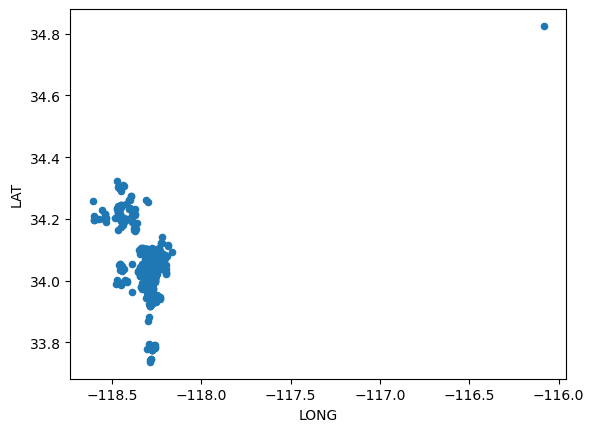

In [67]:
# plotting
df_trimmed.plot.scatter(x='LONG',y='LAT')

It looks like there's one outlier in the data that is showing up much further way from the clustering of projects within LA. The dataset is for LA only so this might be a mistake in the data? But the same of the other plot points resembles the city's shape and appears to be plotted correctly.

Trying some plotly charts and maps

In [68]:
import plotly.express as px

In [69]:
# trying a simple bar chart
fig = px.bar(df_trimmed,
       x='SITE_COMMUNITY',
       title='Affordable Housing Projects by Community, 2003-Present'
      )

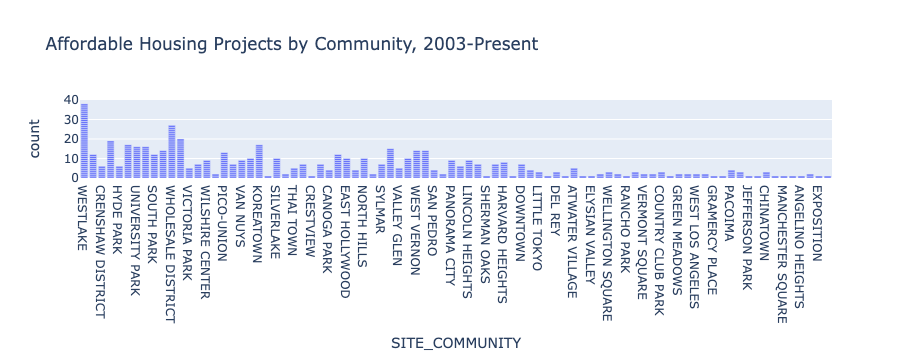

In [70]:
fig.show()

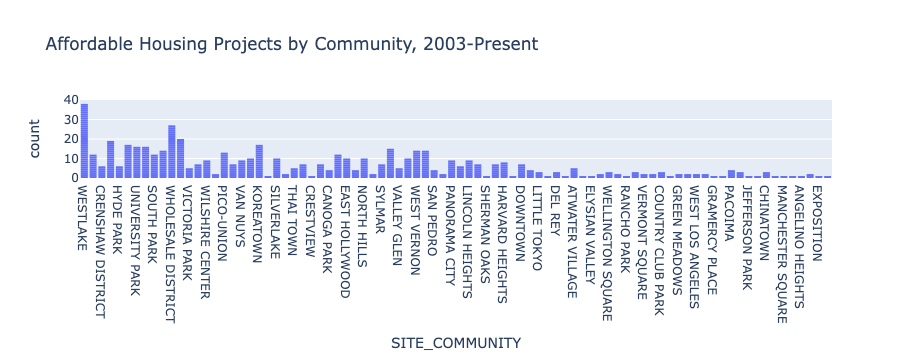

In [71]:
# Updating to remove white lines 
fig.update_traces(marker_line_width=0)

In [72]:
df['SITE COMMUNITY'].value_counts()

WESTLAKE                 38
WHOLESALE DISTRICT       27
HOLLYWOOD                20
CENTRAL                  19
KOREATOWN                17
TEMPLE-BEAUDRY           17
UNIVERSITY PARK          16
EXPOSITION PARK          16
MELROSE                  15
BOYLE HEIGHTS            14
WEST VERNON              14
FLORENCE-FIRESTONE       14
PICO-UNION               13
WATTS                    12
VERMONT VISTA            12
SOUTH PARK               12
SILVERLAKE               10
NORTH HILLS              10
CENTURY PALMS/COVE       10
EAST HOLLYWOOD           10
WEST ADAMS               10
PANORAMA CITY             9
LINCOLN HEIGHTS           9
VAN NUYS                  9
WILSHIRE CENTER           9
HARVARD HEIGHTS           8
DOWNTOWN                  7
HISTORIC FILIPINOTOWN     7
SYLMAR                    7
SUN VALLEY                7
HARBOR GATEWAY            7
WILMINGTON                7
NORTH HOLLYWOOD           7
VERNON CENTRAL            7
RESEDA                    6
HYDE PARK           

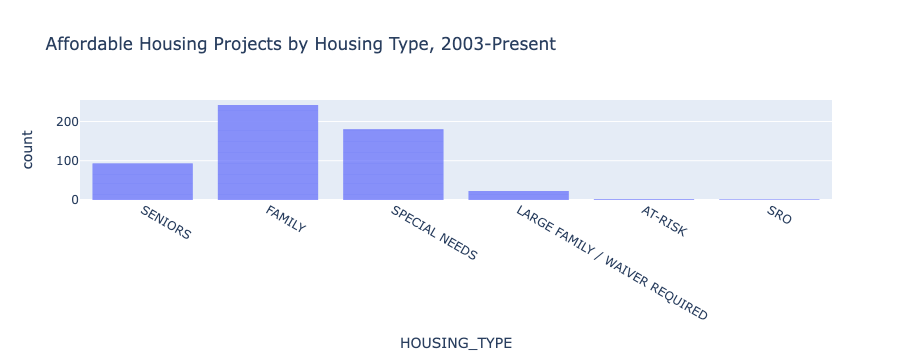

In [73]:
# Bar chart by housing type
fig_type = px.bar(df_trimmed,
       x='HOUSING_TYPE',
       title='Affordable Housing Projects by Housing Type, 2003-Present'
      )
fig_type.update_traces(marker_line_width=0)

fig_type.show()

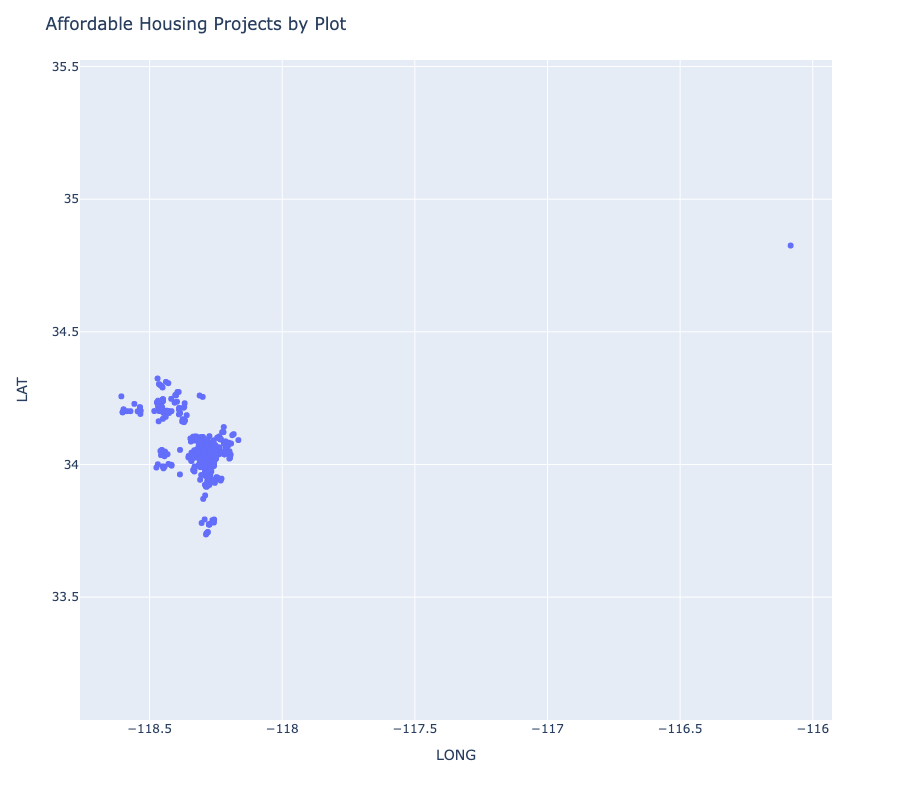

In [74]:
# trying to make plotly interactive scatter plot using lat and long
fig = px.scatter(df_trimmed,
           x='LONG',
           y='LAT'
                )              

fig.update_layout(
    width = 800,
    height = 800,
    title = "Affordable Housing Projects by Plot"
)

fig.update_yaxes(
    scaleanchor = "x",
    scaleratio = 1,
)

fig.show()

Again there appears to be one outlier in the data.

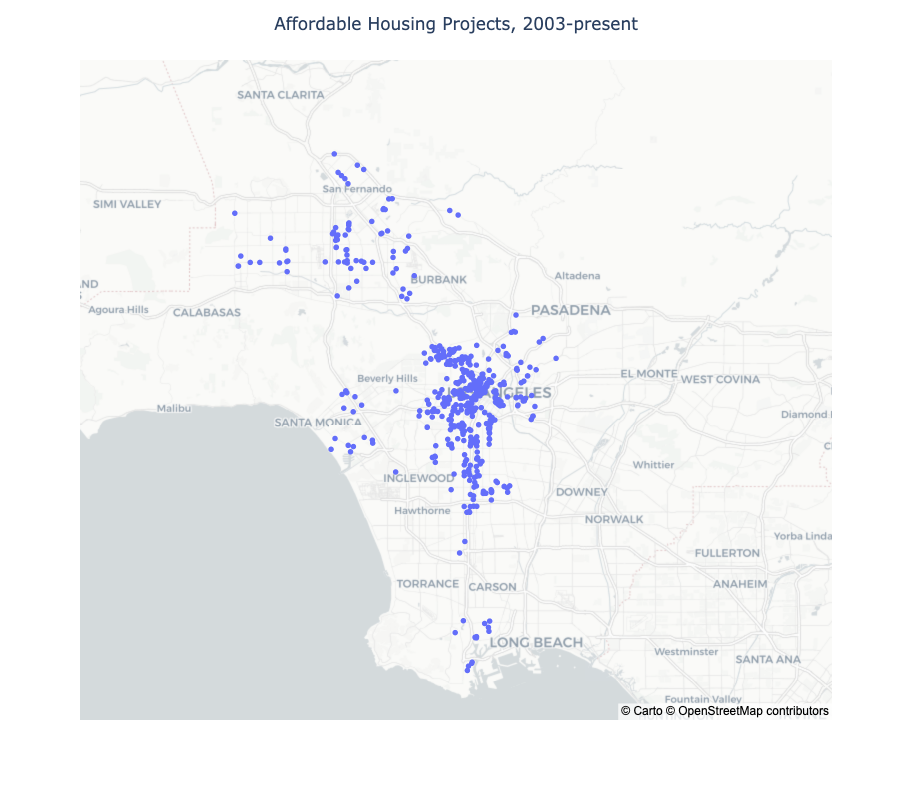

In [75]:
# initially did with df_trimmed2, but updated with just df to be able to add color by site community 

fig = px.scatter_mapbox(df_trimmed,
                        lat='LAT',
                        lon='LONG',
                        mapbox_style="carto-positron",
                        zoom=9) #adjusting zoom to where I want it 

# options on the layout
fig.update_layout(
    width = 800,
    height = 800,
    title = "Affordable Housing Projects, 2003-present",
    title_x=0.5 # aligns title to center
)

fig.show()

This map is looking like what I wanted. From this map, I can see that the majority of affordable housing projects built in the last 20 years have been clustered in central LA, particularly around Westlake. Few projects have been built in west LA, northeast LA, and the west valley.

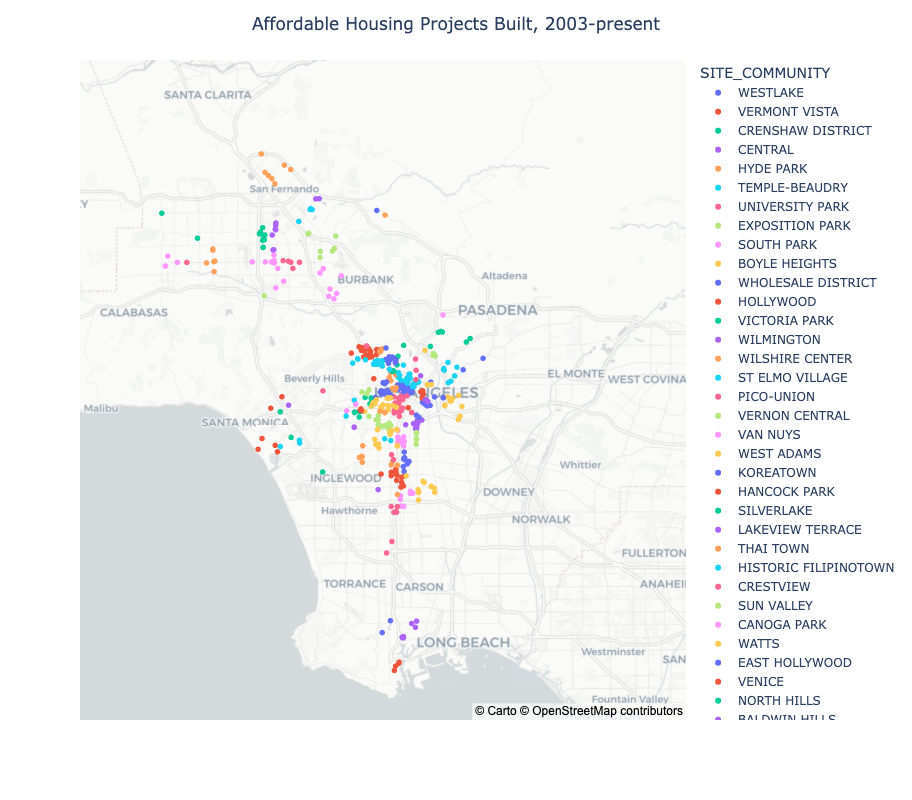

In [76]:
# I want to add color by housing type
fig = px.scatter_mapbox(df_trimmed,
                        lat='LAT',
                        lon='LONG',
                        color="SITE_COMMUNITY",
                        mapbox_style="carto-positron",
                        zoom=9)

fig.update_layout(
    width = 800,
    height = 800,
    title = "Affordable Housing Projects Built, 2003-present",
    title_x=0.5 # aligns title to center
)

fig.show()

I think the colors on the map are visually appealing, but maybe not the most helpful in understanding the neighborhoods where affordable housing is/isn't being built. 

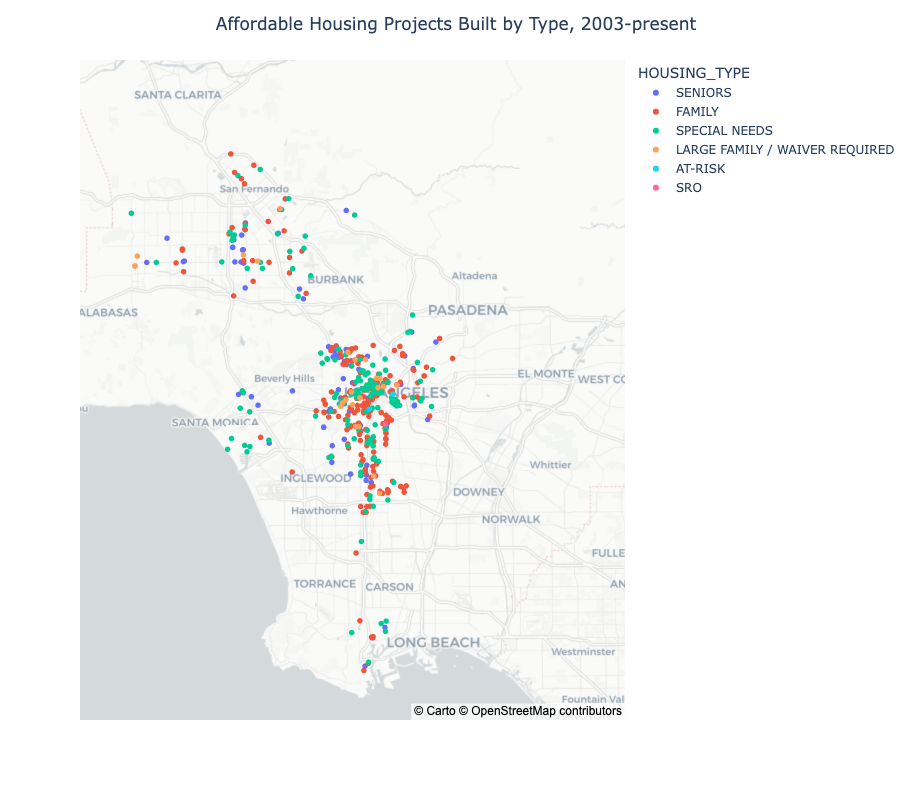

In [77]:
# Trying mapping by color by housing type instead

fig = px.scatter_mapbox(df_trimmed,
                        lat='LAT',
                        lon='LONG',
                        color="HOUSING_TYPE",
                        mapbox_style="carto-positron",
                        zoom=9)

fig.update_layout(
    width = 800,
    height = 800,
    title = "Affordable Housing Projects Built by Type, 2003-present",
    title_x=0.5 # aligns title to center
)

fig.show()

This map appears slightly narrower than the first one. Not sure why. 